In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/kaggle/input/ev-dataset2/EV_Dataset (2).csv")

In [38]:


data=pd.read_csv("/kaggle/input/ev-dataset2/EV_Dataset (2).csv")

In [39]:
list(df.columns)


['Year',
 'Month_Name',
 'Date',
 'State',
 'Vehicle_Class',
 'Vehicle_Category',
 'Vehicle_Type',
 'EV_Sales_Quantity']

In [40]:
df.head(10)


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0
7,2014.0,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
8,2014.0,jan,1/1/2014,Andhra Pradesh,EXCAVATOR (COMMERCIAL),Others,Others,0.0
9,2014.0,jan,1/1/2014,Andhra Pradesh,FORK LIFT,Others,Others,0.0


In [41]:
data.dtypes


Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [42]:
data.columns



Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [43]:
data.shape

(96845, 8)

In [44]:
data.info

<bound method DataFrame.info of          Year Month_Name       Date                     State  \
0      2014.0        jan   1/1/2014            Andhra Pradesh   
1      2014.0        jan   1/1/2014            Andhra Pradesh   
2      2014.0        jan   1/1/2014            Andhra Pradesh   
3      2014.0        jan   1/1/2014            Andhra Pradesh   
4      2014.0        jan   1/1/2014            Andhra Pradesh   
...       ...        ...        ...                       ...   
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
0                        ADAPTED VEHICLE           Others       Others   
1                   AGRICULTURAL TRACTO

In [45]:
# Convert 'Date' column to datetime format:-

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [46]:
# Check for missing values:-

data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


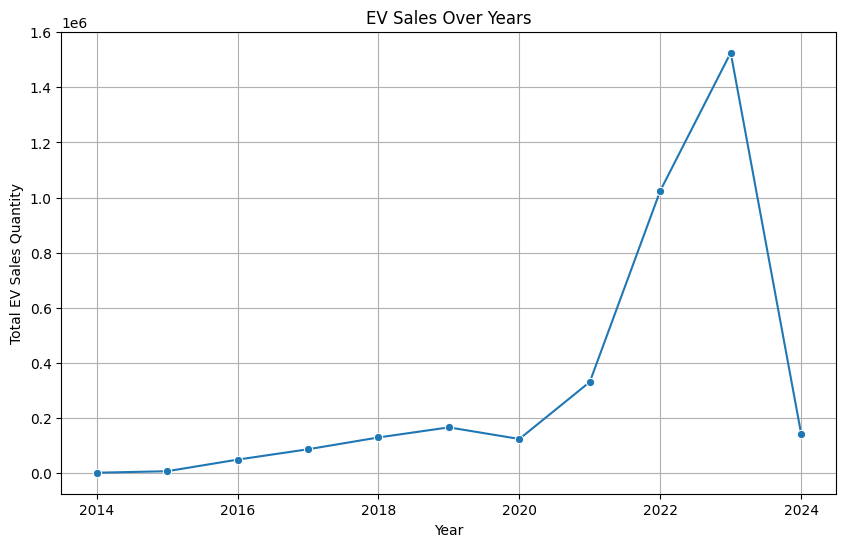

In [47]:
# Plot EV sales over year:-

plt.figure(figsize=(10, 6))
yearly_sales = data.groupby('Year')['EV_Sales_Quantity'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title("EV Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.grid()
plt.show()

/tmp/ipykernel_35/3105582523.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',


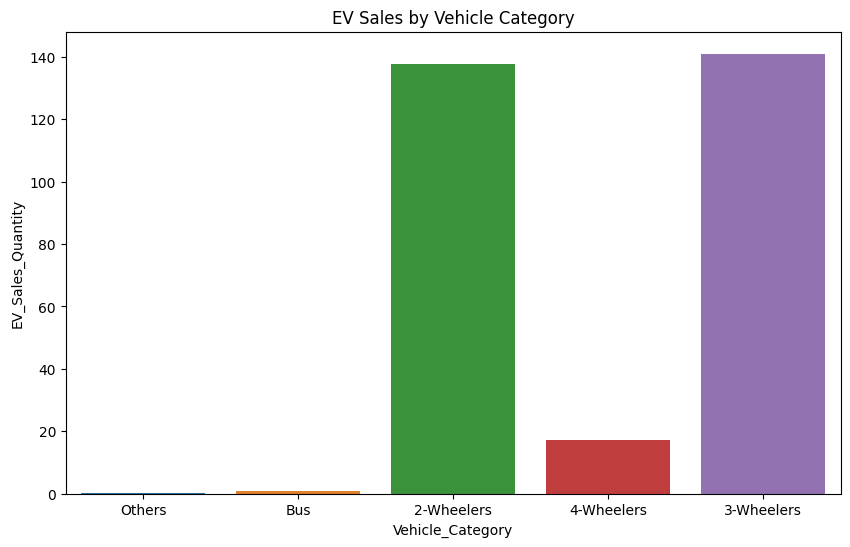

In [48]:
# Plot sales by vehicle category
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',
data=data, ci=None)
plt.title('EV Sales by Vehicle Category')
plt.show()

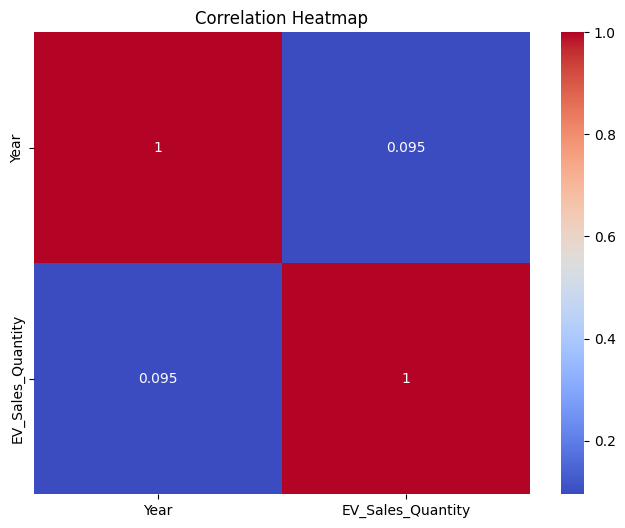

In [49]:
# Select only numeric columns for correlation analysis:-

numeric_df = data.select_dtypes(include=[np.number])

# Plot the correlation heatmap:-

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

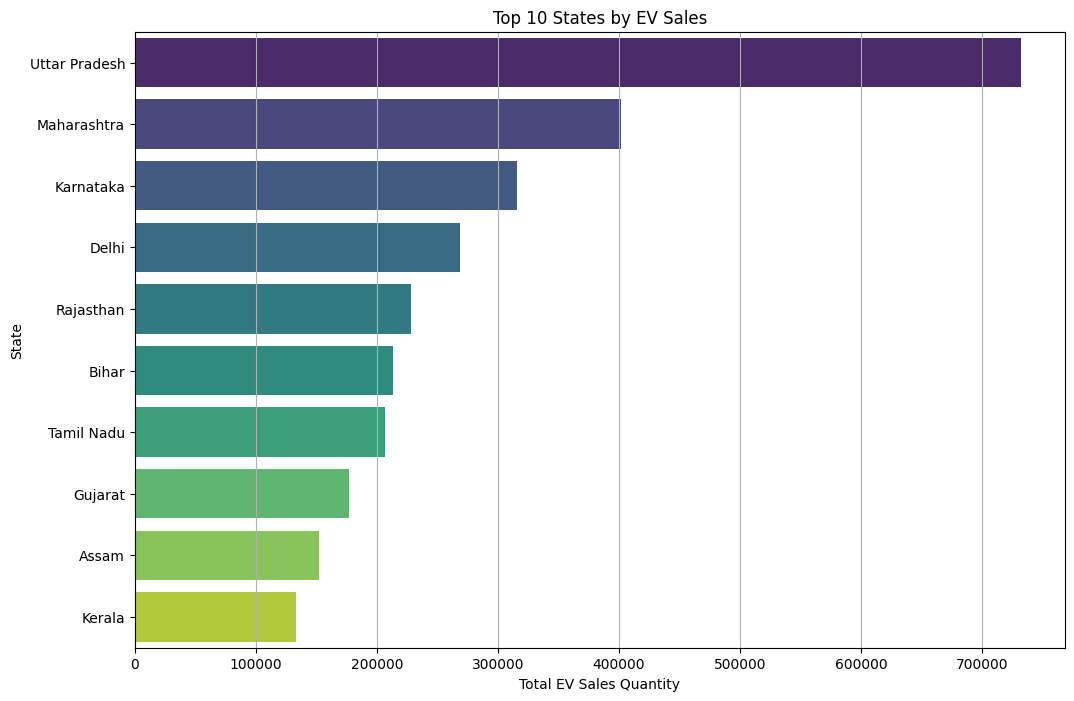

In [50]:
#EV sales by state (top 10 states):-

plt.figure(figsize=(12, 8))
state_sales = data.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title("Top 10 States by EV Sales")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("State")
plt.grid(axis='x')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


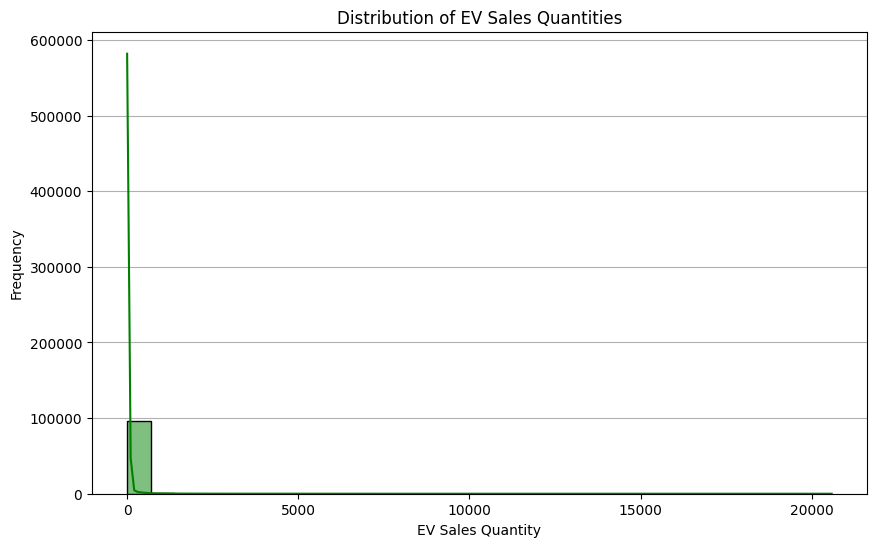

In [51]:
#Distribution of EV sales quantities:-

plt.figure(figsize=(10, 6))
sns.histplot(data['EV_Sales_Quantity'], bins=30, kde=True, color='green')
plt.title("Distribution of EV Sales Quantities")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

<Figure size 1000x800 with 0 Axes>

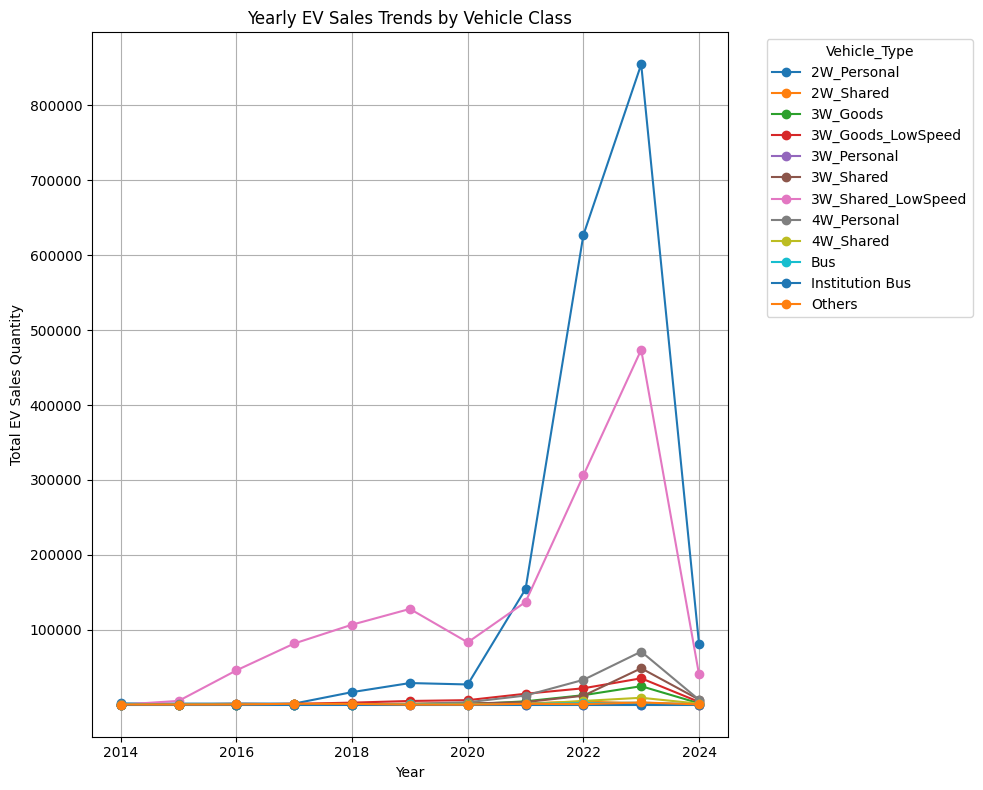

In [52]:
#Yearly sales trends for different vehicle classes:-

plt.figure(figsize=(10, 8))
class_trends = data.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack()
class_trends.plot(kind='line', marker='o', figsize=(10, 8))
plt.title("Yearly EV Sales Trends by Vehicle Class")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000])
plt.legend(title="Vehicle_Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

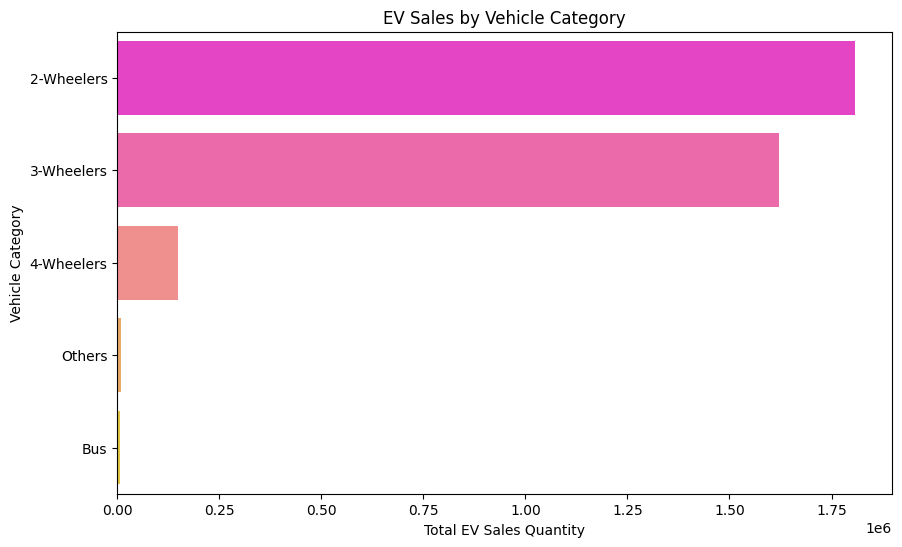

In [53]:
#EV sales by vehicle category:-

plt.figure(figsize=(10, 6))
vehicle_category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=vehicle_category_sales.values, y=vehicle_category_sales.index, palette='spring')
plt.title("EV Sales by Vehicle Category")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("Vehicle Category")
plt.show()

In [54]:
# Step 1: Group by State and Vehicle_Category
grouped = df.groupby(["State", "Vehicle_Category"])["EV_Sales_Quantity"].sum().reset_index()

# Step 2: Filter non-zero sales
grouped = grouped[grouped["EV_Sales_Quantity"] > 0]

# Step 3: Scale EV Sales Quantity
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[["EV_Sales_Quantity"]])

# Step 4: Apply KMeans Clustering
from sklearn.cluster import KMeans
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
grouped["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 5: View Result
print(grouped.sort_values("Cluster"))



                        State Vehicle_Category  EV_Sales_Quantity  Cluster
0    Andaman & Nicobar Island       2-Wheelers               31.0        0
101                   Manipur       3-Wheelers              944.0        0
102                   Manipur       4-Wheelers               39.0        0
104                   Manipur           Others                1.0        0
105                 Meghalaya       2-Wheelers              135.0        0
..                        ...              ...                ...      ...
50                    Gujarat       2-Wheelers           157871.0        0
168               West Bengal           Others              174.0        0
155             Uttar Pradesh       3-Wheelers           641906.0        1
95                Maharashtra       2-Wheelers           342236.0        1
75                  Karnataka       2-Wheelers           278671.0        1

[155 rows x 4 columns]


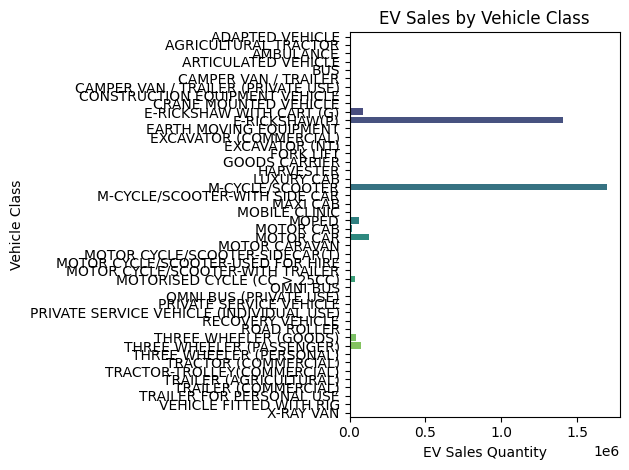

In [55]:
# Group EV sales by Vehicle_Class
vehicle_class_sales = df.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().reset_index()

# Optional: Remove rows with 0 sales
vehicle_class_sales = vehicle_class_sales[vehicle_class_sales["EV_Sales_Quantity"] > 0]

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=vehicle_class_sales,
    x="EV_Sales_Quantity",
    y="Vehicle_Class",  # ✅ Use the correct column name
    palette="viridis"
)
plt.title("EV Sales by Vehicle Class")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()


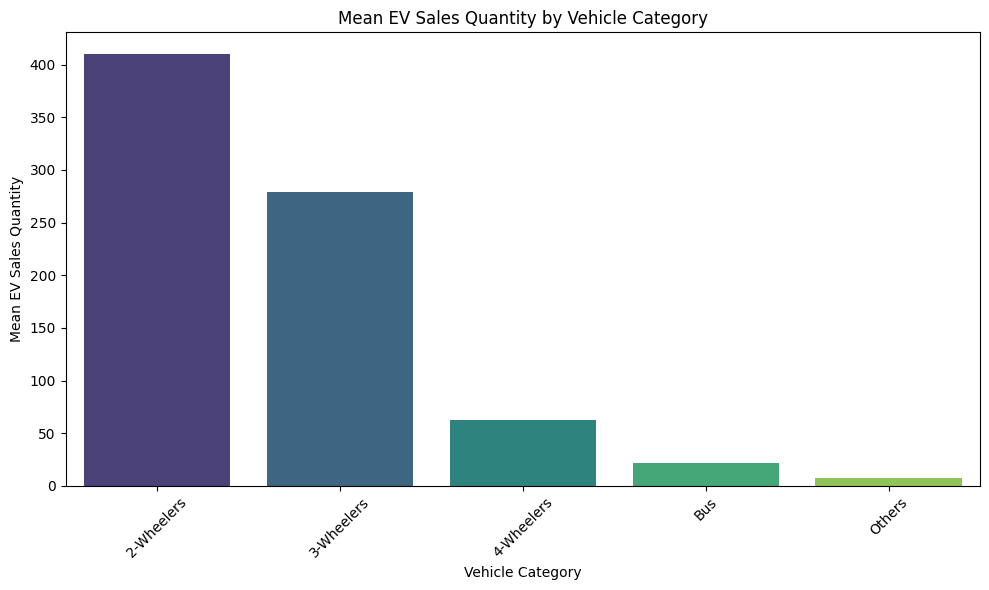

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Vehicle_Category', 'EV_Sales_Quantity'])

# Filter for non-zero sales
df_nonzero = df_clean[df_clean['EV_Sales_Quantity'] > 0]

# Group by category and compute mean
grouped = df_nonzero.groupby('Vehicle_Category')['EV_Sales_Quantity'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='Vehicle_Category',
    y='EV_Sales_Quantity',
    palette='viridis'
)
plt.title('Mean EV Sales Quantity by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Mean EV Sales Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
print(df.columns.tolist())


['year', 'month_name', 'date', 'state', 'vehicle_class', 'vehicle_category', 'vehicle_type', 'ev_sales_quantity']


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


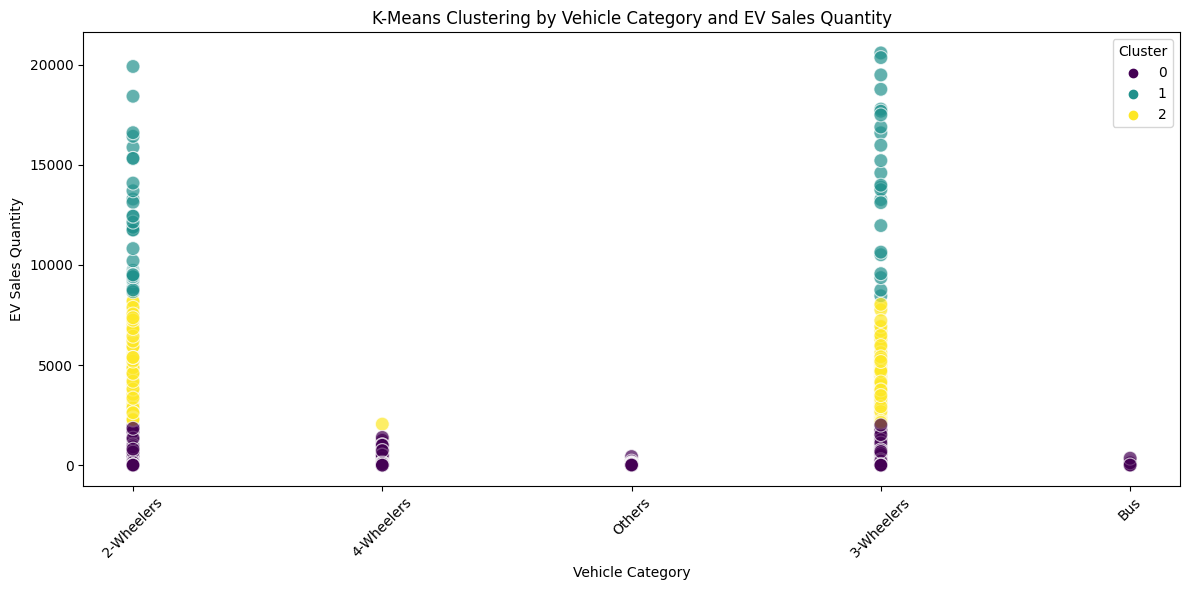

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()

# Filter out rows with missing or invalid values
df_clean = df.dropna(subset=['vehicle_category', 'ev_sales_quantity']).copy()
df_clean['ev_sales_quantity'] = pd.to_numeric(df_clean['ev_sales_quantity'], errors='coerce')
df_clean = df_clean[df_clean['ev_sales_quantity'] > 0]

# Encode the vehicle category into numeric form for clustering
le = LabelEncoder()
df_clean['vehicle_category_encoded'] = le.fit_transform(df_clean['vehicle_category'])

# Prepare data for KMeans
X = df_clean[['vehicle_category_encoded', 'ev_sales_quantity']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x='vehicle_category',
    y='ev_sales_quantity',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('K-Means Clustering by Vehicle Category and EV Sales Quantity')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

